In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn import under_sampling , over_sampling
from sklearn.model_selection import train_test_split
from collections import Counter

In [ ]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
data.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [ ]:
data['EstimatedSalary'].max()

150000

In [ ]:
data['EstimatedSalary'].min()

15000

In [ ]:
x = np.array(data[["Age", "EstimatedSalary"]])
y = np.array(data[["Purchased"]])

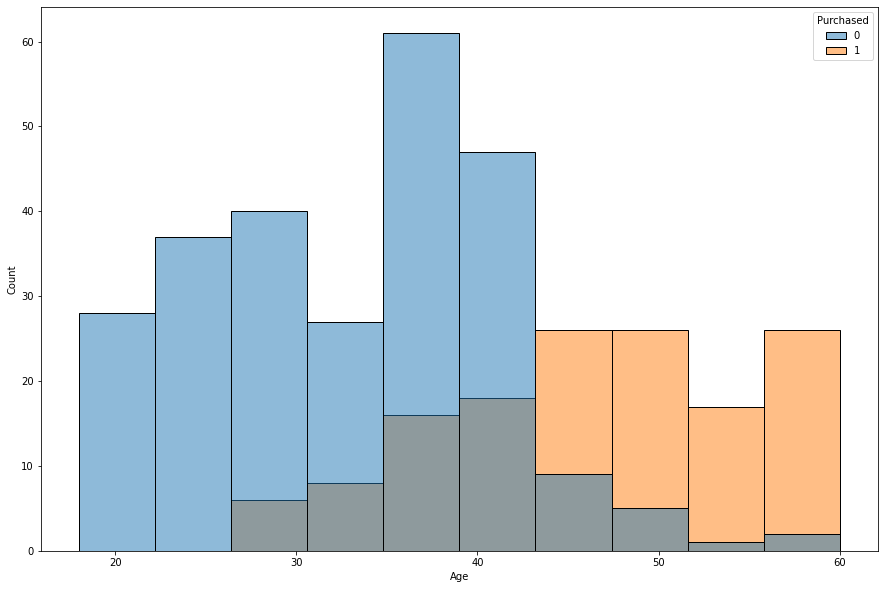

In [ ]:
plt.figure(figsize=(15, 10))
sns.histplot(x="Age", hue="Purchased", data=data)
plt.show()

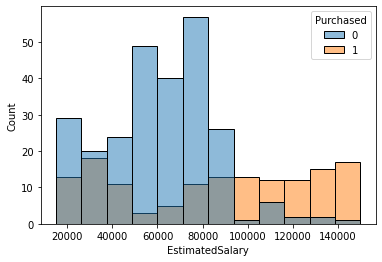

In [ ]:
sns.histplot(x="EstimatedSalary", hue="Purchased", data=data)
plt.show()

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.10, 
                                                random_state=42)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

In [ ]:
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.71      0.77      0.74        13

    accuracy                           0.82        40
   macro avg       0.80      0.81      0.80        40
weighted avg       0.83      0.82      0.83        40

